In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv("Cleaned_BRCA.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           334 non-null    object 
 1   Age                  334 non-null    int64  
 2   Gender               334 non-null    object 
 3   Protein1             334 non-null    float64
 4   Protein2             334 non-null    float64
 5   Protein3             334 non-null    float64
 6   Protein4             334 non-null    float64
 7   Tumour_Stage         334 non-null    object 
 8   Histology            334 non-null    object 
 9   ER status            334 non-null    object 
 10  PR status            334 non-null    object 
 11  HER2 status          334 non-null    object 
 12  Surgery_type         334 non-null    object 
 13  Date_of_Surgery      334 non-null    object 
 14  Date_of_Last_Visit   334 non-null    object 
 15  Patient_Status       334 non-null    obj

In [ ]:
df.shape

(334, 18)

In [ ]:
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,Tumor_Stage_Numeric,Year_of_Surgery
0,TCGA-D8-A1XD,36,FEMALE,0.080,0.426,0.547,0.274,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,2017-01-15,2017-06-19,Alive,3,2017
1,TCGA-EW-A1OX,43,FEMALE,-0.420,0.578,0.614,-0.032,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,2017-04-26,2018-11-09,Dead,2,2017
2,TCGA-A8-A079,69,FEMALE,0.214,1.311,-0.327,-0.234,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2017-09-08,2018-06-09,Alive,3,2017
3,TCGA-D8-A1XR,56,FEMALE,0.345,-0.211,-0.193,0.124,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,2017-01-25,2017-07-12,Alive,2,2017
4,TCGA-BH-A0BF,56,FEMALE,0.222,1.907,0.520,-0.312,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2017-05-06,2019-06-27,Dead,2,2017


In [ ]:
df.describe(include=object)

,Patient_ID,Gender,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
count,334,334,334,334,334,334,334,334,334,334,334
unique,334,2,3,3,1,1,2,4,181,286,3
top,TCGA-D8-A1XD,FEMALE,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2018-11-06,1900-01-01,Alive
freq,1,330,189,233,334,334,305,105,5,17,255


In [ ]:
df.describe()

,Age,Protein1,Protein2,Protein3,Protein4,Tumor_Stage_Numeric,Year_of_Surgery
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,-0.029982,0.946883,-0.090198,0.009805,2.050898,2018.179641
std,12.961212,0.563602,0.911671,0.585196,0.629067,0.657904,0.717063
min,29.000000,-2.341000,-0.979000,-1.627000,-2.026000,1.000000,2017.000000
25%,49.000000,-0.359250,0.362250,-0.514000,-0.377000,2.000000,2018.000000
50%,58.000000,0.006500,0.992500,-0.173000,0.042000,2.000000,2018.000000
75%,68.000000,0.343500,1.627750,0.278250,0.425750,2.000000,2019.000000
max,90.000000,1.594000,3.402000,2.193000,1.630000,3.000000,2019.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Date_of_Last_Visit'] = pd.to_datetime(df['Date_of_Last_Visit'])
df['Date_of_Surgery'] = pd.to_datetime(df['Date_of_Surgery'])

In [ ]:
df.loc[df['Date_of_Last_Visit'] == '1-1-1900', 'Date_of_Last_Visit'] = df.loc[df['Date_of_Last_Visit'] == '1/1/1900', 'Date_of_Surgery']

In [ ]:
df[df['Date_of_Last_Visit']=='1-1-1900']

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,Tumor_Stage_Numeric,Year_of_Surgery


In [ ]:

# Calculate the difference between the two dates
df['Time_Difference'] = (df['Date_of_Last_Visit'] - df['Date_of_Surgery']).dt.days
df[df['Time_Difference']<0]

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,Tumor_Stage_Numeric,Year_of_Surgery,Time_Difference


In [ ]:
df.loc[df['Date_of_Last_Visit'] == '5/3/2026', 'Date_of_Last_Visit'] = '5/3/2018'
df.loc[df['Date_of_Last_Visit'] == '9/24/2026', 'Date_of_Last_Visit'] = '9/24/2019'

In [ ]:
df[df['Date_of_Last_Visit']=='5/3/2026']
df[df['Date_of_Last_Visit']=='9/24/2026']

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,Tumor_Stage_Numeric,Year_of_Surgery,Time_Difference


# EDA

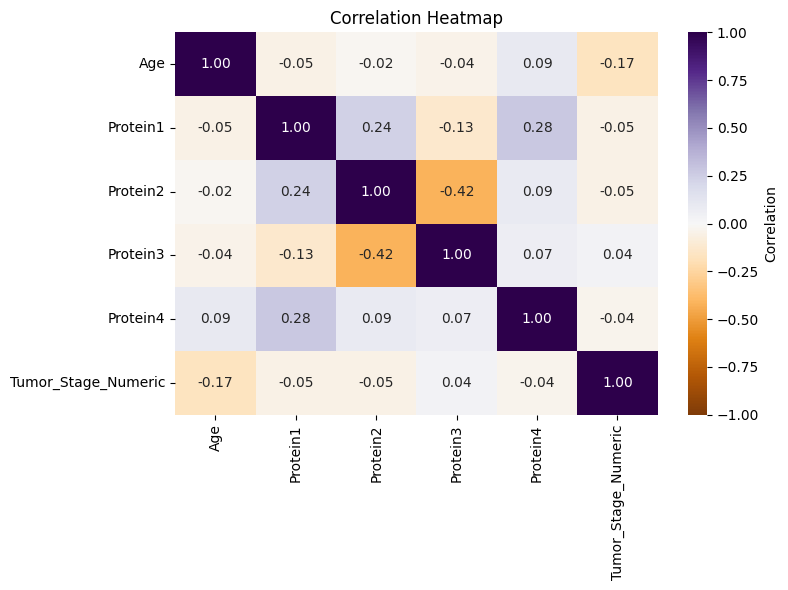

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select relevant columns for correlation
df_co = df[['Age','Protein1','Protein2','Protein3','Protein4','Tumor_Stage_Numeric']]

# Calculate the correlation matrix
cor = df_co.corr()

# Create a figure and axis
plt.figure(figsize=(8, 6))

# Create the heatmap with Seaborn
sns.heatmap(cor, annot=True, fmt='.2f', cmap='PuOr', vmin=-1, vmax=1,
            cbar_kws={'label': 'Correlation'})

# Add a title
plt.title('Correlation Heatmap')

# Show the plot
plt.tight_layout()
plt.show()


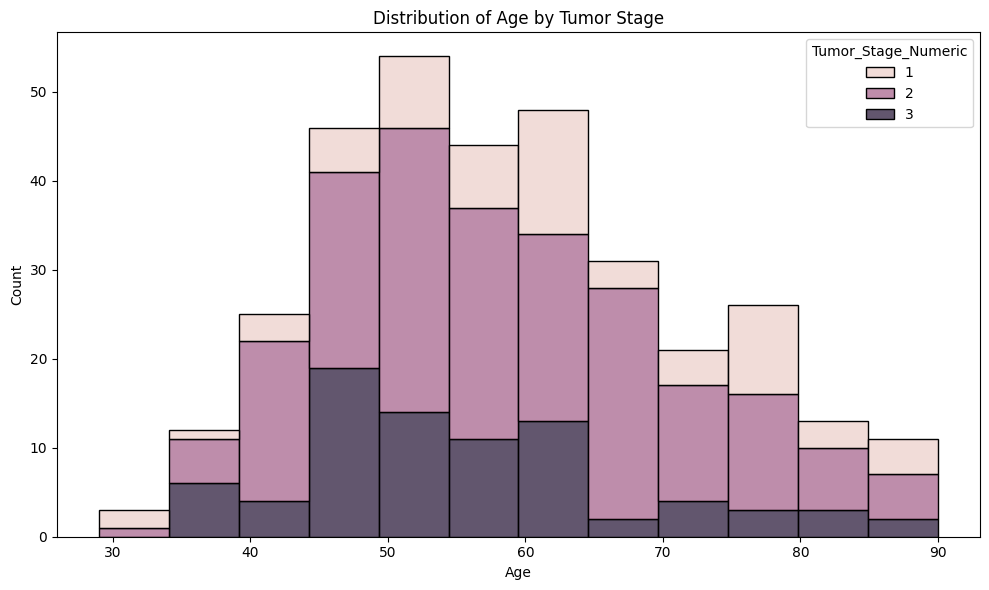

In [ ]:
# Create the histogram using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Tumor_Stage_Numeric', multiple='stack')

# Add title and labels
plt.title('Distribution of Age by Tumor Stage')
plt.xlabel('Age')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()


this chart shows :
1- The patients in average get cancer in the period between 35 to 89 which is a large interval
2- Most of patients descover the disease at the second stage

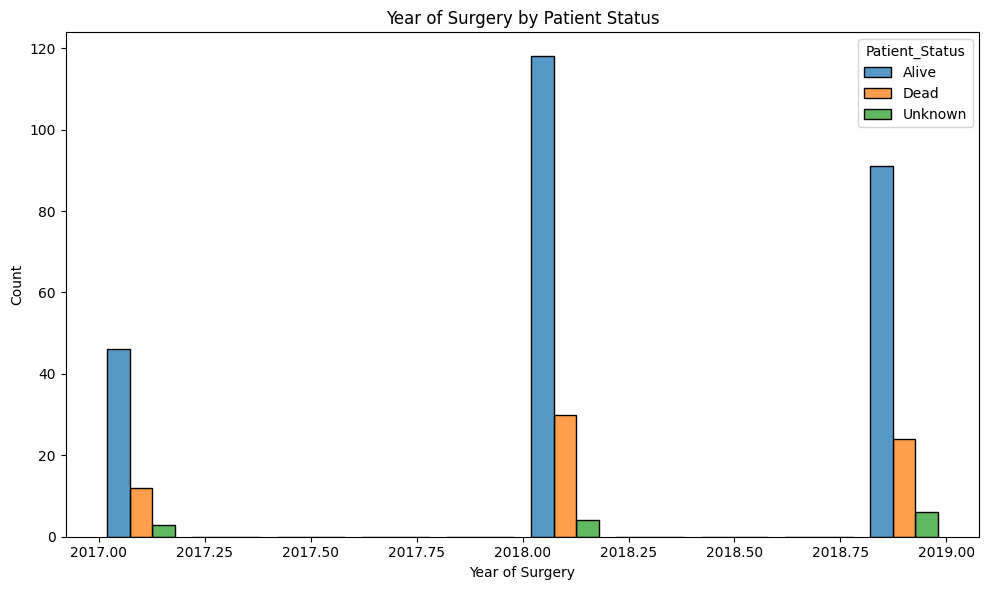

In [ ]:
# Create the histogram using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Year_of_Surgery', hue='Patient_Status',
             multiple='dodge', shrink=0.8)

# Add title and labels
plt.title('Year of Surgery by Patient Status')
plt.xlabel('Year of Surgery')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()


this chart shows :
1- the bigest number of surgeries performed in 2018
2- most of patients that do the surgery is alive
3- 2017 has the lowest number of surgeries

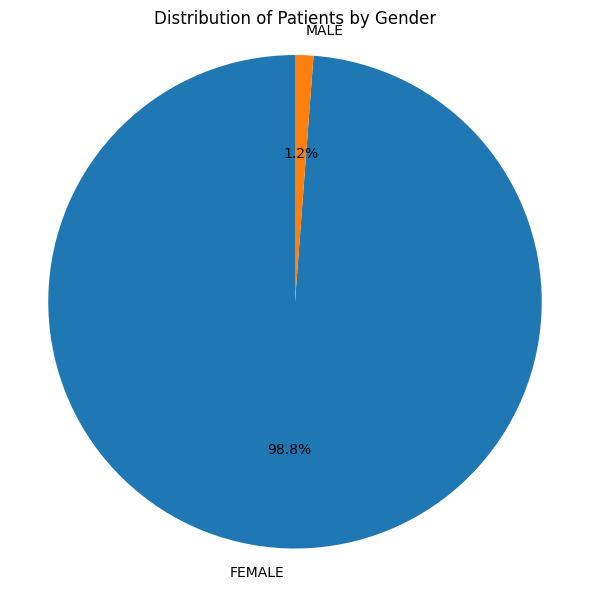

In [ ]:
# Get the gender counts
gender_counts = df['Gender'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Distribution of Patients by Gender')

# Ensure the pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.tight_layout()
plt.show()


most of patients are women and a few of men get sick to not only women

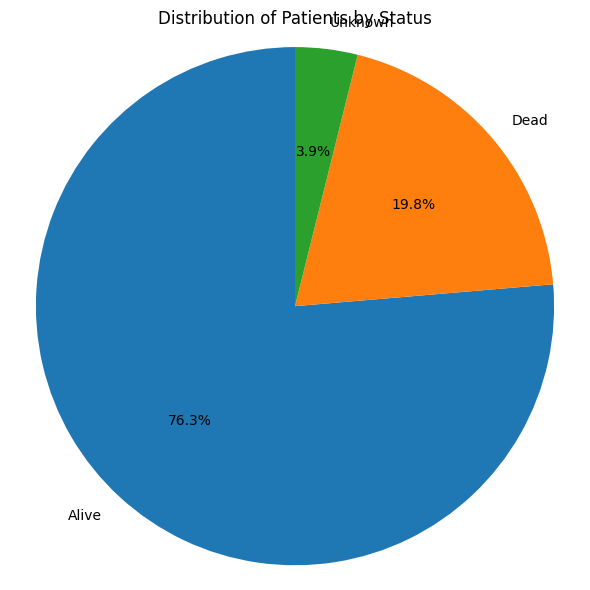

In [ ]:
# Get the patient status counts
patient_status_counts = df['Patient_Status'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(patient_status_counts.values, labels=patient_status_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Distribution of Patients by Status')

# Ensure the pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.tight_layout()
plt.show()


about 20% of those patients dies and about 77% lives this show the dinger of this disease

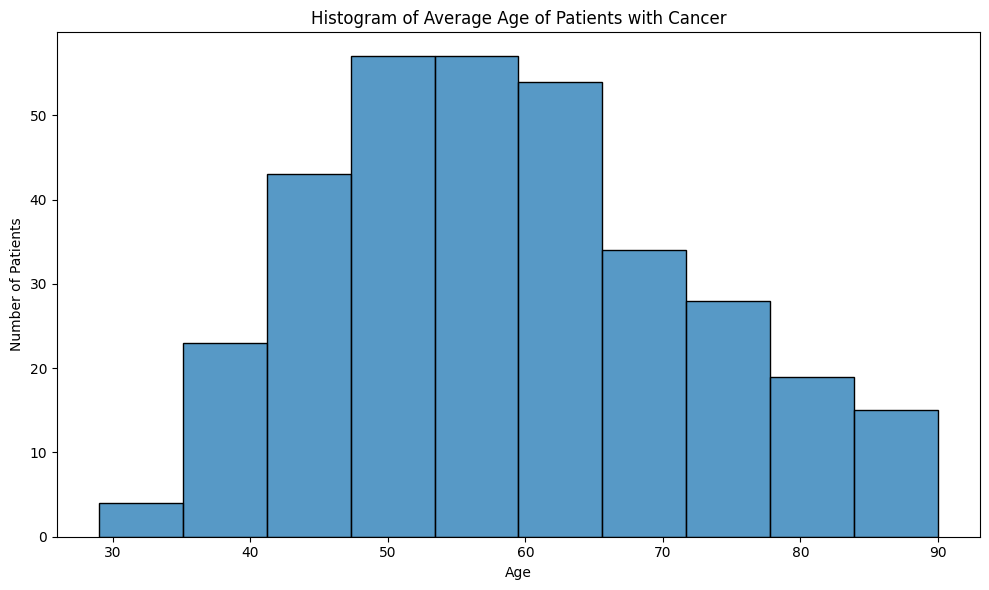

In [ ]:
# Create the histogram using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=10)

# Update the layout: add titles and labels
plt.title('Histogram of Average Age of Patients with Cancer')
plt.xlabel('Age')
plt.ylabel('Number of Patients')

# Show the plot
plt.tight_layout()
plt.show()


this histogram shows the distribution of the patients ages and asure what we said in the last charts

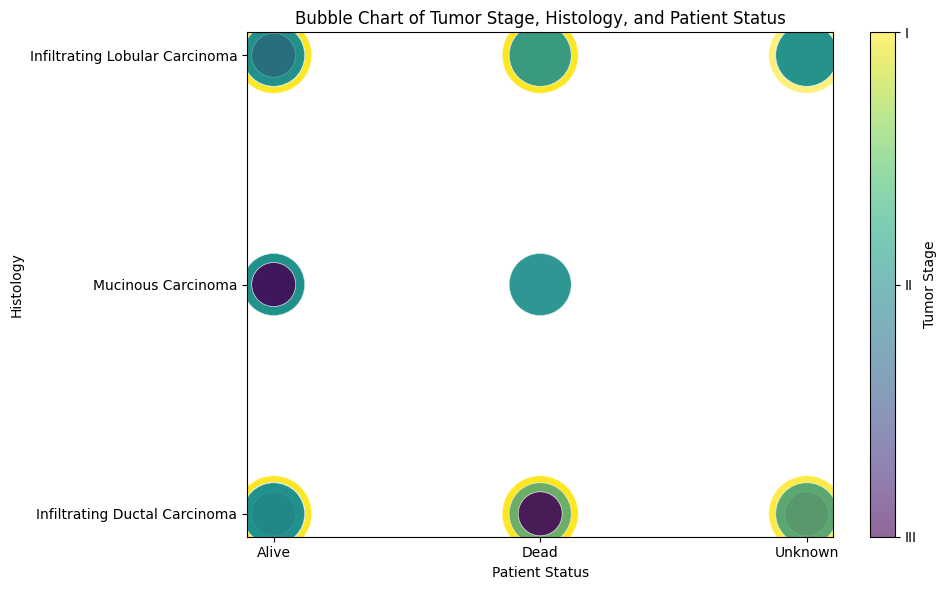

In [ ]:
# Create a scatter plot using Matplotlib
plt.figure(figsize=(10, 6))

# Create the scatter plot with bubble sizes
scatter = plt.scatter(data=df, x='Patient_Status', y='Histology',
                      s=df['Tumor_Stage_Numeric'] * 1000,  # Scale size for visibility
                      c=df['Tumour_Stage'].astype('category').cat.codes,  # Color by Tumour Stage
                      cmap='viridis', alpha=0.6, edgecolors='w', linewidth=0.5)

# Add color bar to indicate tumor stage
plt.colorbar(scatter, ticks=range(len(df['Tumour_Stage'].unique())),
             label='Tumor Stage', format=plt.FuncFormatter(lambda x, _: df['Tumour_Stage'].unique()[int(x)]))

# Update the layout: add titles and labels
plt.title('Bubble Chart of Tumor Stage, Histology, and Patient Status')
plt.xlabel('Patient Status')
plt.ylabel('Histology')

# Show the plot
plt.tight_layout()
plt.show()


this chart shows :    
1- Mucinous Carcinoma discovers in the first two stages and most of those who reach to second stage they almost dies
2- Infiltrating Lobular Carcinoma exists in all ages but in the most in first stage
3- Infiltrating Ductal Carcinoma exists in all ages but in the most in first stage

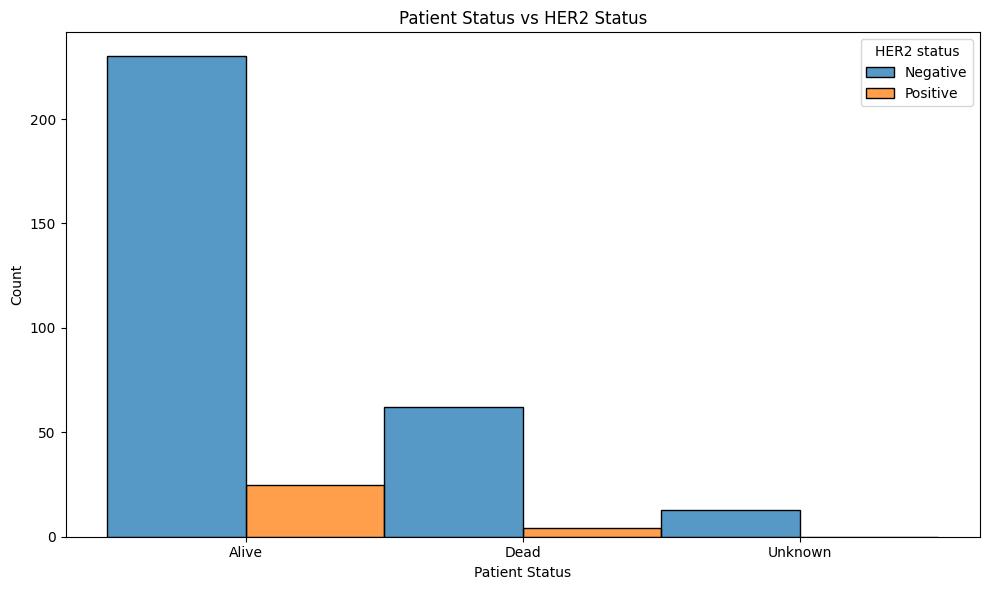

In [ ]:
# Create the grouped histogram using Seaborn
plt.figure(figsize=(10, 6))

# Create the histogram
sns.histplot(data=df, x='Patient_Status', hue='HER2 status', multiple='dodge', binwidth=1)

# Update the layout: add titles and labels
plt.title('Patient Status vs HER2 Status')
plt.xlabel('Patient Status')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()


This chart shows that
1- about 79% of patient with HER2 Negative are alive and 21% dead
2- about 87% of patient with HER2 Poeitive are alive and 13% dead

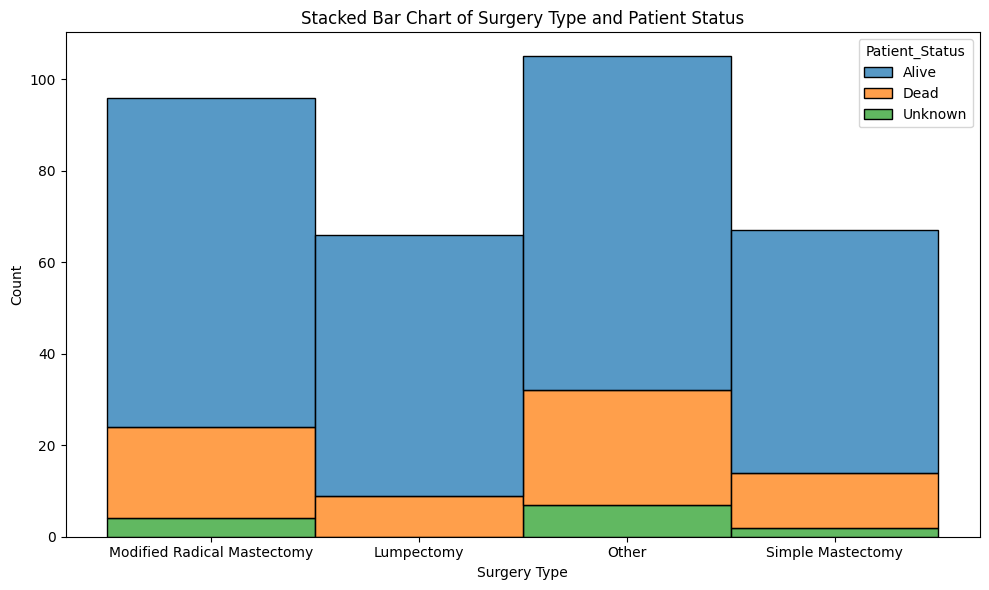

In [ ]:
# Create the stacked histogram using Seaborn
plt.figure(figsize=(10, 6))

# Create the histogram with stacking
sns.histplot(data=df, x='Surgery_type', hue='Patient_Status', multiple='stack')

# Update the layout: add titles and labels
plt.title('Stacked Bar Chart of Surgery Type and Patient Status')
plt.xlabel('Surgery Type')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()


this chart shows:
1- the best sugery that has the max success is Lumpectomy by 86% alive and 14% dead
2- the worst is Modified Radical Mastecomy by 78% alive and 22% dead

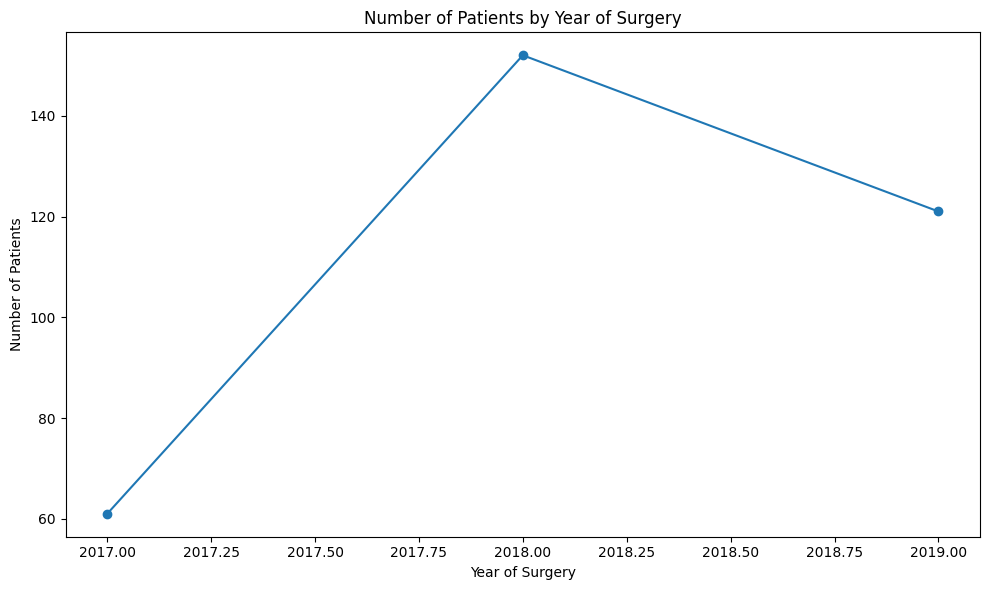

In [ ]:
# Group the data by 'Year_of_Surgery' and count the number of patients
year_surgery_counts = df.groupby('Year_of_Surgery')['Patient_ID'].count().reset_index()

# Create the line chart using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(year_surgery_counts['Year_of_Surgery'], year_surgery_counts['Patient_ID'], marker='o')

# Update the layout: add titles and labels
plt.title('Number of Patients by Year of Surgery')
plt.xlabel('Year of Surgery')
plt.ylabel('Number of Patients')

# Show the plot
plt.tight_layout()
plt.show()


That shows the distribution of surgeries betweeb 2017 to 2019 as we said 2018 has the max number of surgeries

<ipython-input-25-bd62a124d6dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Patient_Status', y='Time_Difference', data=df, palette='viridis')


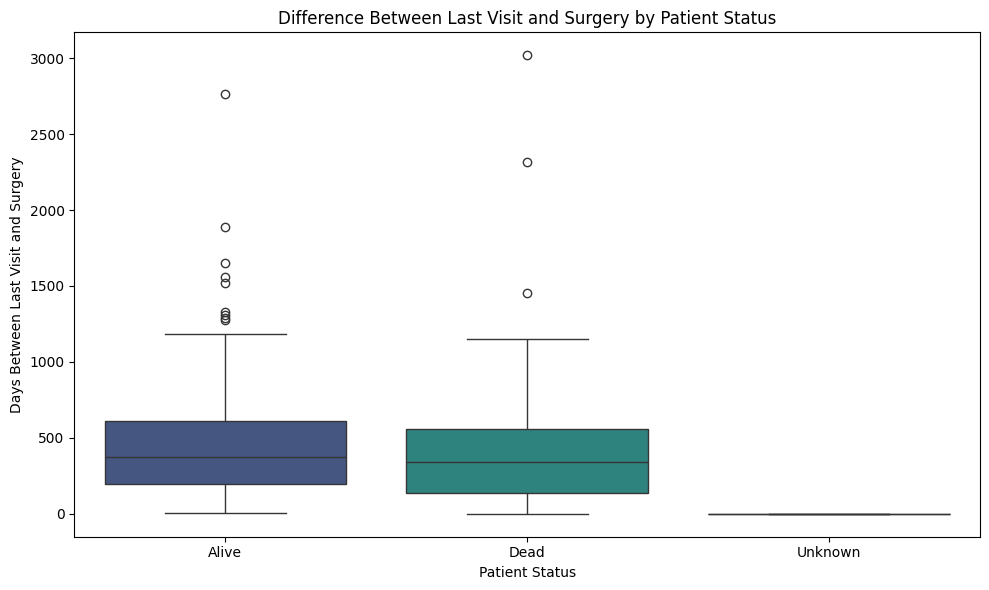

In [ ]:
# Create the box plot using Matplotlib
plt.figure(figsize=(10, 6))
sns.boxplot(x='Patient_Status', y='Time_Difference', data=df, palette='viridis')

# Update the layout: add titles and labels
plt.title('Difference Between Last Visit and Surgery by Patient Status')
plt.xlabel('Patient Status')
plt.ylabel('Days Between Last Visit and Surgery')

# Show the plot
plt.tight_layout()
plt.show()


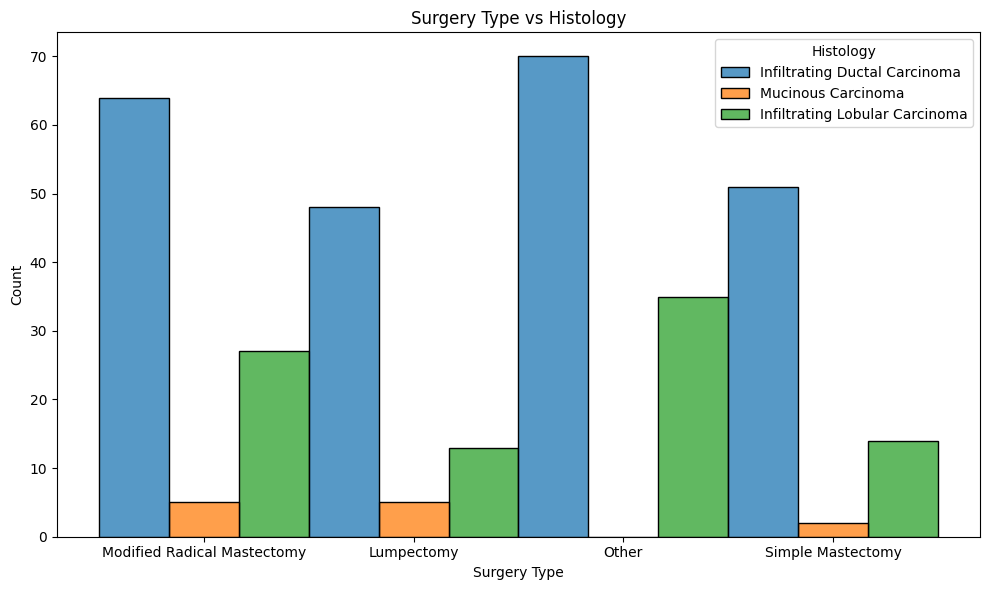

In [ ]:
# Create the grouped histogram using Seaborn
plt.figure(figsize=(10, 6))

# Create the histogram with grouping
sns.histplot(data=df, x='Surgery_type', hue='Histology', multiple='dodge', bins=10)

# Update the layout: add titles and labels
plt.title('Surgery Type vs Histology')
plt.xlabel('Surgery Type')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()


that show the relation between histology and surgery type :
1- most surgeries deals with Infiltrating Ductal Carcinoma but in common we use other surgeries for it
2- we use just Modified Radical Mastecomy and Lumpectomy more Simple Mastecomy and other surgeries
3- most surgeries deals with Infiltrating Labular Carcinoma but in common we use other surgeries for it

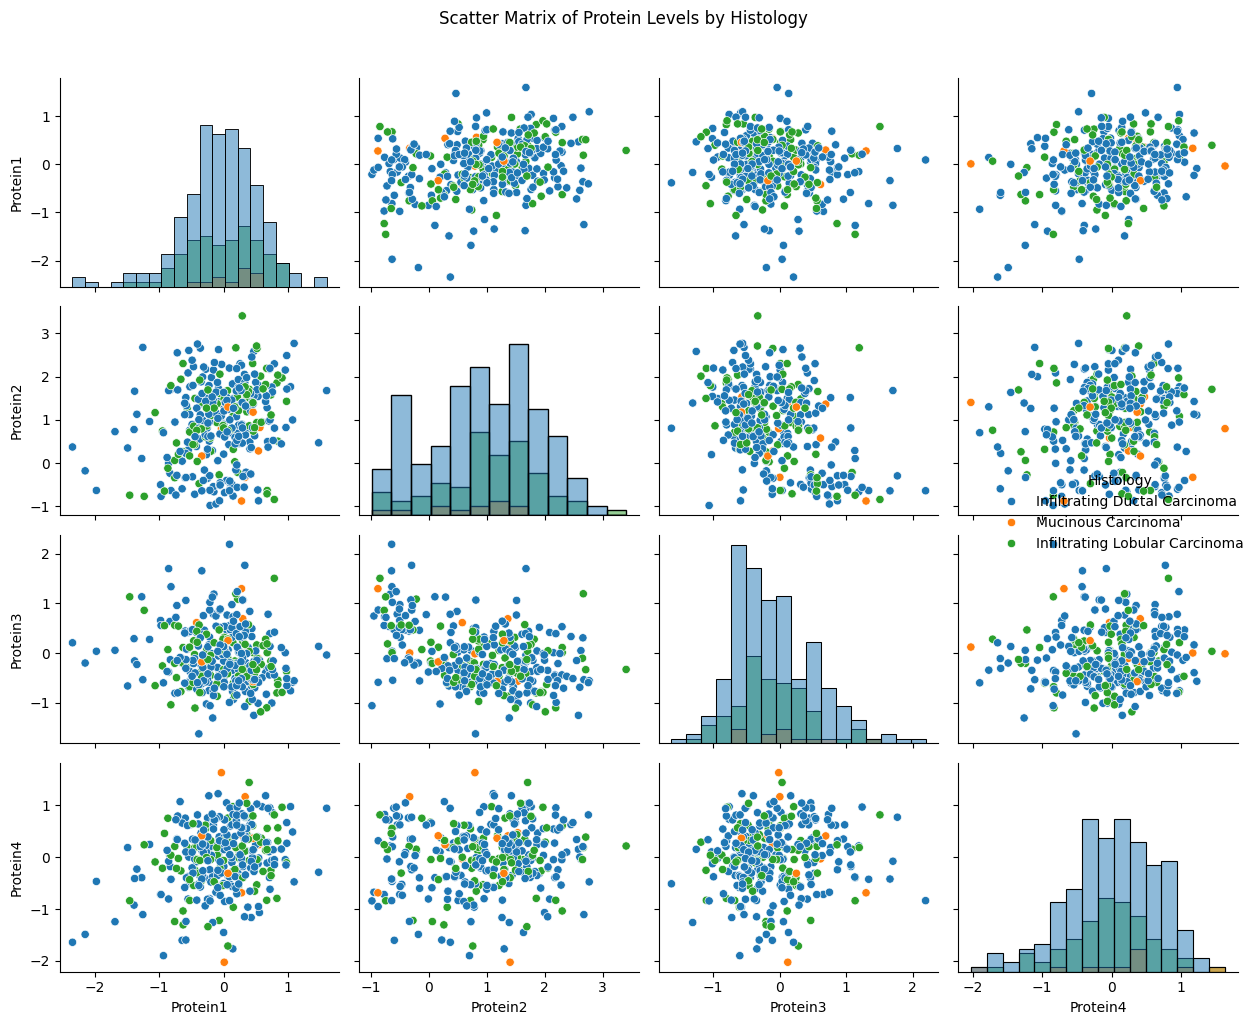

In [ ]:
sns.pairplot(df, vars=['Protein1', 'Protein2', 'Protein3', 'Protein4'], hue='Histology', diag_kind='hist')

# Update the layout: add a title
plt.suptitle('Scatter Matrix of Protein Levels by Histology', y=1.02)

# Show the plot
plt.tight_layout()
plt.show()

1-Correlations: If the scatter plots show a clear diagonal or linear pattern for any pair of proteins, it indicates a potential correlation between those proteins.
2-Histology Patterns: You can observe whether certain histology types tend to group together in specific protein combinations, which might provide insights into how different cancer types relate to protein expression.
3-Protein Distributions: From the diagonal histograms, you can easily see the distribution of each protein level, including skewness, multimodality, or normal distribution patterns.


In [ ]:
print ("This is the Conclosion")

This is the Conclosion


#Conclusion
The analysis of patient data reveals significant insights into cancer demographics, treatment outcomes, and histological patterns. The distribution of age indicates that cancer primarily affects individuals between 35 and 89 years, with most diagnoses occurring at the second stage.

Surgery data highlights that 2018 had the highest surgical interventions, with a notable majority of patients remaining alive post-surgery. Gender distribution shows a predominance of female patients, emphasizing the need for targeted awareness.

Further analysis of tumor types shows Mucinous Carcinoma is critical, as most patients in the second stage face dire outcomes. Treatment success varies, with Lumpectomy demonstrating the highest survival rates (86%), while Modified Radical Mastectomy shows the lowest (78%).

The correlation analysis among protein expressions suggests potential relationships that warrant further investigation, particularly in understanding how these proteins interact with different cancer types.

Overall, these findings underline the complexity of cancer treatment and the importance of early diagnosis, tailored surgical approaches, and ongoing research into tumor biology and patient outcomes.

# Actual Analysis

**How does the type of surgery affect long-term patient outcomes?**
Identifying Best and Worst Performing Surgeries: the surgeries with the highest rate is "Lumpectomy" and the lowest rate is " Other Types except those 3 types ".

**Modified Radical Mastectomy** is very dangerous so it needs experienced doctors and it's a good sign for the hospitals .



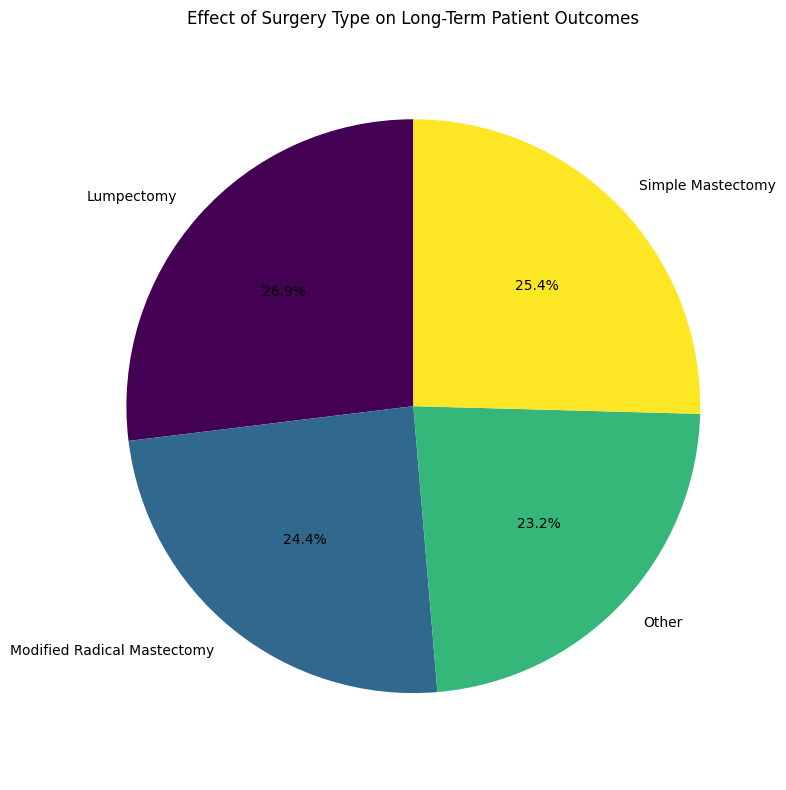

In [ ]:
# Group data by surgery type and patient status to calculate long-term outcomes
outcomes_by_surgery = df.groupby(['Surgery_type', 'Patient_Status']).size().unstack(fill_value=0)
outcomes_by_surgery['Survival Rate'] = outcomes_by_surgery['Alive'] / (outcomes_by_surgery['Alive'] + outcomes_by_surgery['Dead'])

# Create a pie chart to show survival rate by surgery type
plt.figure(figsize=(8, 8))
plt.pie(outcomes_by_surgery['Survival Rate'], labels=outcomes_by_surgery.index, autopct='%1.1f%%',
        startangle=90, colors=plt.cm.viridis(np.linspace(0, 1, len(outcomes_by_surgery))))

# Equal aspect ratio ensures the pie chart is a circle.
plt.axis('equal')
plt.title("Effect of Surgery Type on Long-Term Patient Outcomes")

# Show the plot
plt.tight_layout()
plt.show()


**The age group that benefits the most from each surgery**

**Modified Redical Mastectomy** has the highest couunt between 55-59 .

**Lumpectomy** has the highest couunt between 60-64 .

**Simple Mastectomy** has the highest couunt between 50-54 .

**Others types** has the highest couunt between 55-59 .



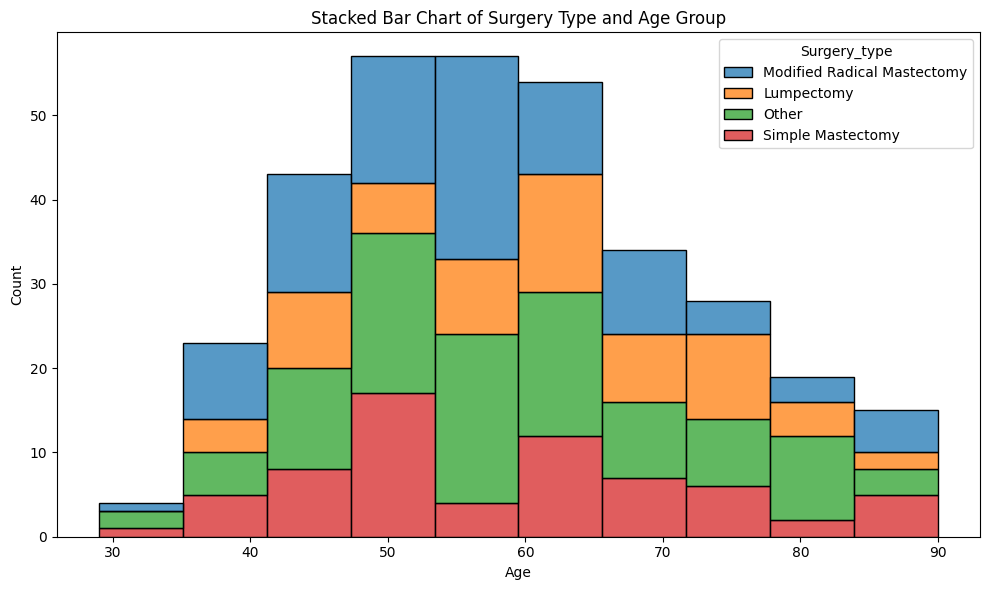

In [ ]:
# Create the stacked histogram using Seaborn
plt.figure(figsize=(10, 6))

# Create the histogram with stacking
sns.histplot(data=df, x='Age', hue='Surgery_type', multiple='stack', bins=10)

# Update the layout: add titles and labels
plt.title('Stacked Bar Chart of Surgery Type and Age Group')
plt.xlabel('Age')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()


**What is the most common age group among males and females diagnosed with cancer?**

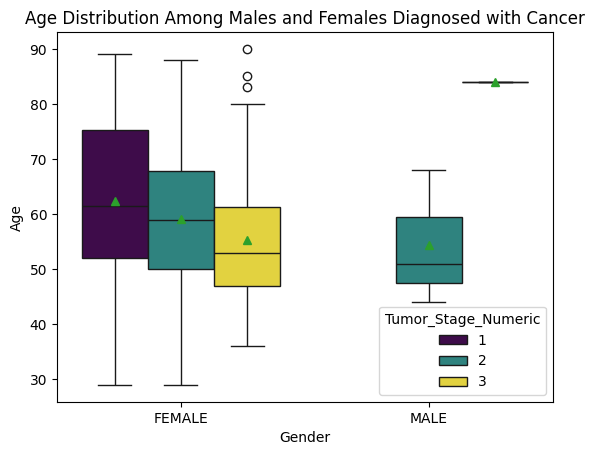

In [ ]:
sns.boxplot(
    x = "Gender",
    y = "Age",
    hue = "Tumor_Stage_Numeric",
    showmeans=True,
    data=df,
    palette="viridis"
)

# Customize title and labels
plt.title('Age Distribution Among Males and Females Diagnosed with Cancer')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

**-What is the most common tumor stage at the time of diagnosis**

<ipython-input-32-615a8cd43d4e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


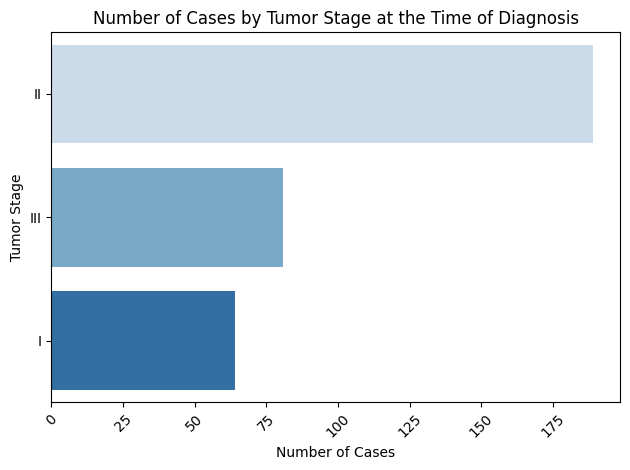

In [ ]:
tumor_stage_counts = df['Tumour_Stage'].value_counts().reset_index()
tumor_stage_counts.columns = ['Tumour_Stage', 'Count']

# Create the bar chart (horizontal) with color palette
sns.barplot(
    x = "Count",
    y = "Tumour_Stage",
    palette="Blues",  # Choose a color palette
    data=tumor_stage_counts
)

# Set title and labels
plt.title("Number of Cases by Tumor Stage at the Time of Diagnosis")
plt.xlabel('Number of Cases')
plt.ylabel('Tumor Stage')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)  # Adjust rotation angle if needed

plt.tight_layout()
plt.show()

**What is the survival rate based on the tumor stage at the time of surgery**

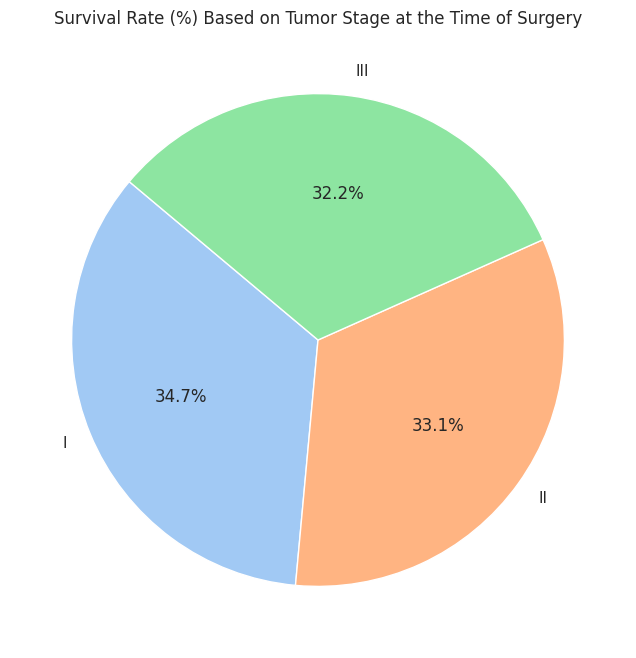

In [ ]:
# Calculate the survival column
df['Survival'] = df['Patient_Status'].apply(lambda x: 1 if x == 'Alive' else 0)

# Calculate survival rate for each tumor stage and convert to percentage
survival_rate_by_stage = df.groupby('Tumour_Stage')['Survival'].mean().reset_index()
survival_rate_by_stage['Survival Rate (%)'] = survival_rate_by_stage['Survival'] * 100

# Set Seaborn style
sns.set(style="whitegrid")

# Pie chart using Matplotlib with Seaborn color palette
plt.figure(figsize=(8, 8))
plt.pie(
    survival_rate_by_stage['Survival Rate (%)'],  # Values for the pie chart
    labels=survival_rate_by_stage['Tumour_Stage'],  # Categories
    autopct='%1.1f%%',  # Format for displaying percentage
    startangle=140,  # Starting angle for better layout
    colors=sns.color_palette("pastel")  # Pastel color palette from Seaborn
)

# Set title
plt.title("Survival Rate (%) Based on Tumor Stage at the Time of Surgery")

# Show the plot
plt.show()


**What is the distribution of surgery types across different tumor stages**

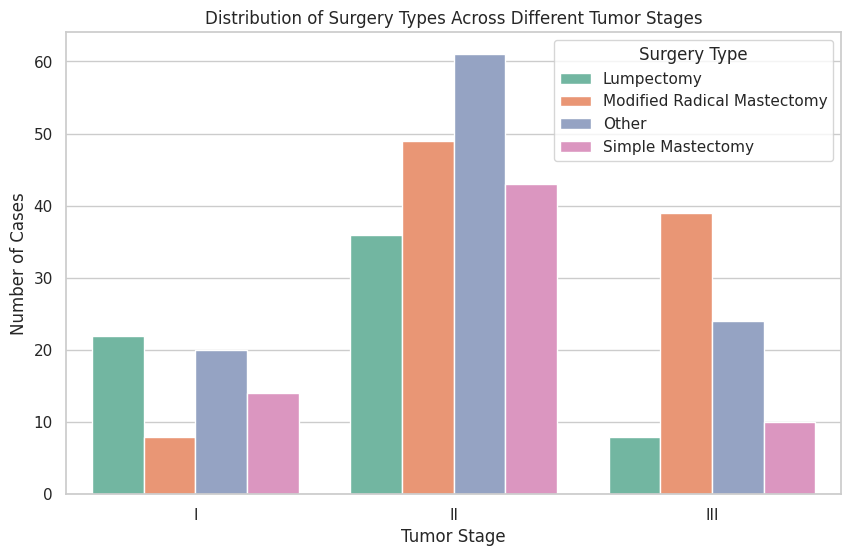

In [ ]:
surgery_distribution = df.groupby(['Tumour_Stage', 'Surgery_type']).size().reset_index(name='Count')

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a grouped bar plot using Seaborn
sns.barplot(data=surgery_distribution,
            x='Tumour_Stage',
            y='Count',
            hue='Surgery_type',
            palette='Set2')  # Choose a color palette

# Set the title and labels
plt.title("Distribution of Surgery Types Across Different Tumor Stages")
plt.xlabel("Tumor Stage")
plt.ylabel("Number of Cases")
plt.legend(title="Surgery Type")

# Show the plot
plt.show()

**What percentage of patients diagnosed with Infiltrating Lobular Carcinoma survived after treatment**

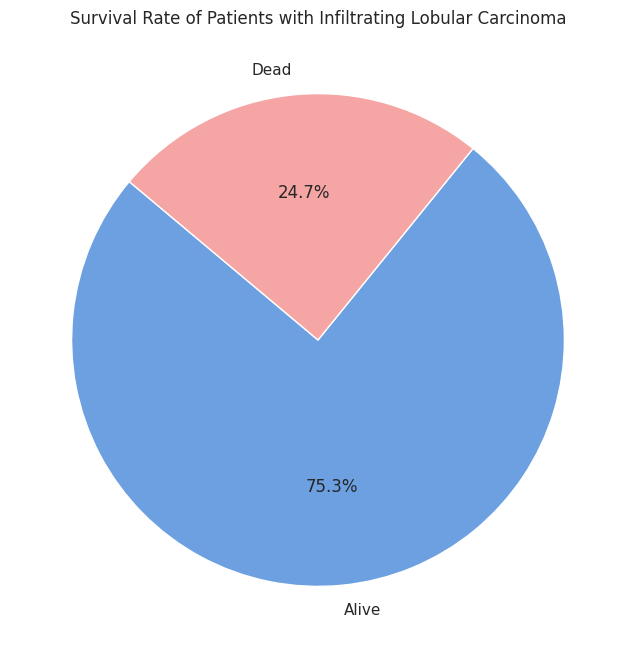

In [ ]:
lobular_carcinoma = df[df['Histology'] == 'Infiltrating Lobular Carcinoma']

survived_count = lobular_carcinoma[lobular_carcinoma['Patient_Status'] == 'Alive'].shape[0]

total_count = lobular_carcinoma.shape[0]

survival_rate = (survived_count / total_count) * 100 if total_count > 0 else 0

values = [survived_count, total_count - survived_count]
labels = ['Alive', 'Dead']

plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#6ca0e0', '#f6a5a5'])

plt.title('Survival Rate of Patients with Infiltrating Lobular Carcinoma')

plt.show()

**What was the most common type of surgery performed on patients with Infiltrating Lobular Carcinoma, and how did it impact survival**

Most common surgery type: Other


<ipython-input-36-766a877b1709>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=survival_by_surgery,


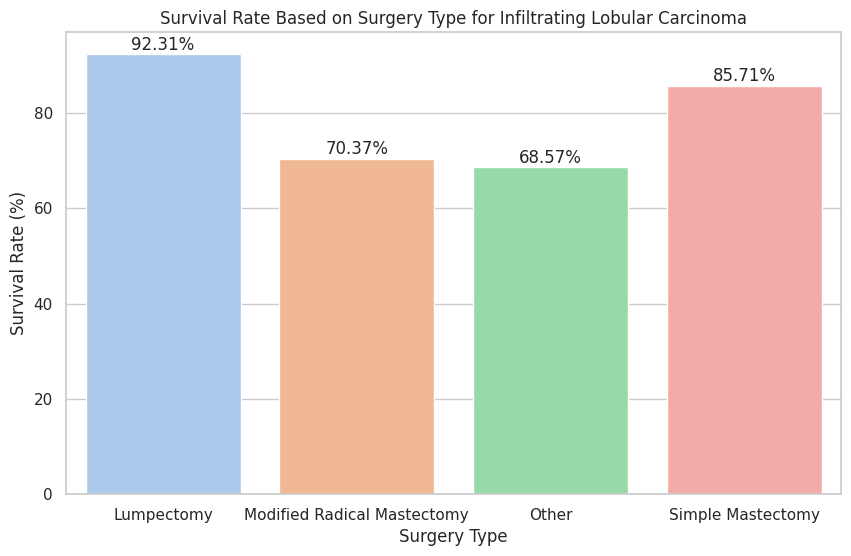

In [ ]:
lobular_carcinoma = df[df['Histology'] == 'Infiltrating Lobular Carcinoma']

# حساب عدد الجراحات لكل نوع
surgery_counts = lobular_carcinoma['Surgery_type'].value_counts().reset_index()
surgery_counts.columns = ['Surgery_type', 'Count']

# عرض نوع الجراحة الأكثر شيوعاً
most_common_surgery = surgery_counts.loc[surgery_counts['Count'].idxmax()]
print(f"Most common surgery type: {most_common_surgery['Surgery_type']}")

# حساب نسبة البقاء لكل نوع جراحة
survival_by_surgery = lobular_carcinoma.groupby('Surgery_type')['Patient_Status'].apply(
    lambda x: (x == 'Alive').mean() * 100).reset_index()
survival_by_surgery.columns = ['Surgery_type', 'Survival_Rate']

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot using Seaborn
sns.barplot(data=survival_by_surgery,
            x='Surgery_type',
            y='Survival_Rate',
            palette='pastel')

# Add text on top of the bars
for index, row in survival_by_surgery.iterrows():
    plt.text(row.name, row.Survival_Rate + 1, f'{row.Survival_Rate:.2f}%', ha='center')

# Set title and labels
plt.title('Survival Rate Based on Surgery Type for Infiltrating Lobular Carcinoma')
plt.xlabel('Surgery Type')
plt.ylabel('Survival Rate (%)')

# Show the plot
plt.show()

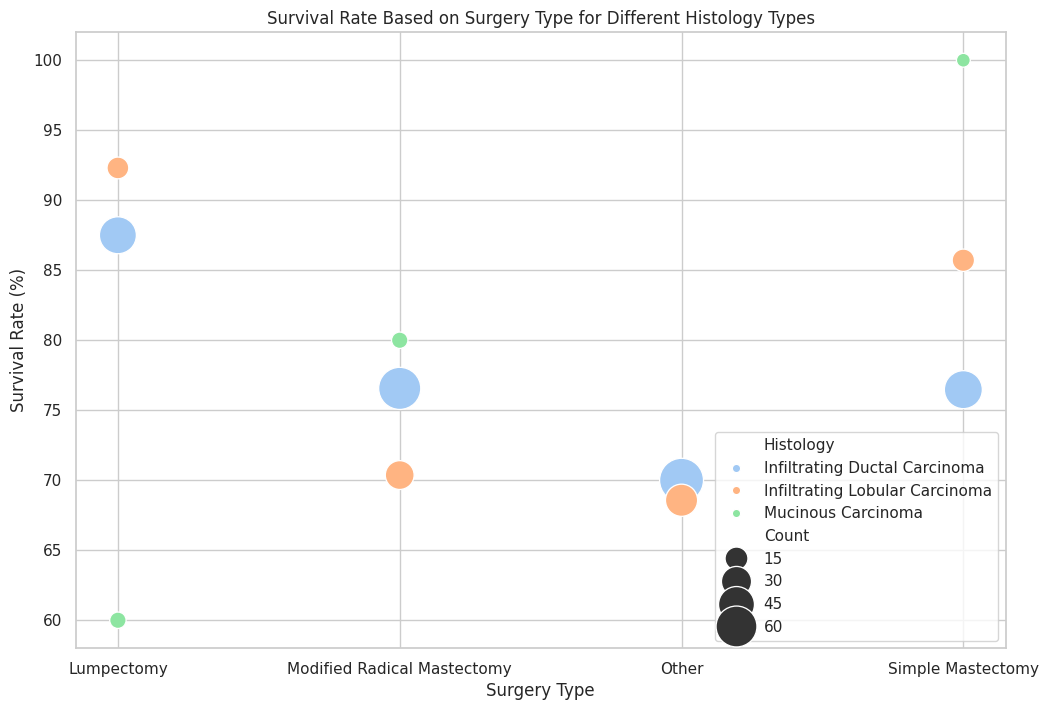

In [ ]:

surgery_counts_by_histology = df.groupby(['Histology', 'Surgery_type']).size().reset_index(name='Count')

# حساب معدل البقاء لكل نوع جراحة لكل نوع من الأنسجة
survival_by_histology_surgery = df.groupby(['Histology', 'Surgery_type'])['Patient_Status'].apply(
    lambda x: (x == 'Alive').mean() * 100).reset_index()
survival_by_histology_surgery.columns = ['Histology', 'Surgery_type', 'Survival_Rate']

# دمج البيانات
combined_data = pd.merge(surgery_counts_by_histology, survival_by_histology_surgery, on=['Histology', 'Surgery_type'])

# Set figure size
plt.figure(figsize=(12, 8))

# Create a scatter plot using Seaborn
sns.scatterplot(data=combined_data,
                x='Surgery_type',
                y='Survival_Rate',
                size='Count',
                sizes=(100, 1000),  # Adjust the min and max size for the bubbles
                hue='Histology',
                palette='pastel')

# Set title and axis labels
plt.title('Survival Rate Based on Surgery Type for Different Histology Types')
plt.xlabel('Surgery Type')
plt.ylabel('Survival Rate (%)')

# Show the plot
plt.show()
